**Kaggle** это самый крупный портал на котором проходят соревнования по машинному обучению
(участвовать в них может любой). В качестве домашнего задания предлагается попытать свои силы
на наборе данных **Титаник**.

Начните выполнение этого задания с посещения этой страницы:

https://www.kaggle.com/c/titanic

1. Перейдя по этой ссылке вы попадете на вкладку **Overview**, в верхнем правом углу есть кнопка **Join competition**, после того как вы ее нажмете вы сможете скачать данные по выжившим в крушении Титаника в разделе **Data**.

2. Там же в разделе **Data** в подразделе **Data description**, расположено описание всех признаков содержащихся в данных. 

3. Раздел **Kernels** содержит готовые решения, опубликованные разными людьми ввиде jupyter notebook'ов (некоторые на языке R, большая часть на языке Python).

4. Раздел **Discussion** - это форум посвященный данному соревнованию (Соревнование Titanic это учебное соревнование для всех).

5. В разделе **Leaderboard** можно увидеть результаты других участников соревнования (на тестовой выборке). Не удивляйтесь большому количеству *идеальных* accuracy (categorization accuracy это тоже самое что и обычное accuracy), данные о пассажирах Титаника есть в открытом доступе и некоторые зачем то их сабмитят (время от времени админы подтирают такие строчки). 

-----------------------


### Ваша ультимативная цель: провести анализ данных, обучить модель (подобрав параметры на кросс валидации), сделать предсказания на тестовом наборе данных и засабмитить их на Leaderboard что бы увидеть получившуюся accuracy.

Простой анализ данных и несложное решение для начинающих можно увидеть вот здесь https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner
(оно было опубликовано буквально несколько часов назад).
По завершении выполнения домашки, сходите по этой ссылке и сравните свой jupyter notebook и этот.

----------------------

В этом ноутбуке (в котором вы сейчас ^_^) я проведу вас по основным этапам, но выполнить вы их должны будете самостоятельно.

Итак наметим план:

1. Скачаем данные: два .csv файла train_data и test_data, в файле test_data отсутствует колонка Survived (на них мы будем делать предсказания обученной моделью).
2. Откроем набор данных train_data в Jupyter notebook.
3. Проведем Обзорный Анализ Данных (Exploratory Data Analysis сокращенно EDA)
4. Обработаем категориальные признаки
5. Обработаем пропуски в данных (если они есть)
6. Обработаем числовые признаки
7. Обучим 3 модели (или больше):
    - Метод ближайшего соседа (подберем параметр k - число соседей, на кросс-валидации)
    - Метод логистической регрессии (подберем параметры регуляризации - alpha, на кросс-валидации)
    - Метод решающего дерева (подберем параметры глубины дерева, и другие на кросс-валидации)
8. Подобрав оптимальный набор параметров обучим наши модели на всех объектах из файла train_data.
9. Откроем набор данных test_data в Jupyter notebook.
10. Проведем шаги 4-6 над test_data аналогично тому как мы это делали на train_data. 
11. Сделаем предсказания с помощью моделей (обученных на шаге 7.) на обработанных test_data.
12. Сохраним предсказания в нужном формате и загрузим на Leaderboard на Kaggle.


На всякий случай помните, что в этой домашке главными являются пункты 3-11 если у вас возникнут трудности со скачиванием данных или загрузкой результатов предсказания на Leadearboard смело пишите мне я помогу (да и вообще в случае любых вопросов пишите).

Начнем

# 1. Скачаем данные

![data_download](download.png)

In [2]:
import io
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error

In [3]:
import requests

In [4]:
train = pd.read_csv('C:\\Users\\care1e55\\Downloads\\titanic\\train.csv') 

In [5]:
test = pd.read_csv('C:\\Users\\care1e55\\Downloads\\titanic\\test.csv') 

In [6]:
train.shape

(891, 12)

In [7]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [12]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
print(train.Age.sum())

21205.17


In [15]:
print(train.Age.describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [16]:
train.Age.median()

28.0

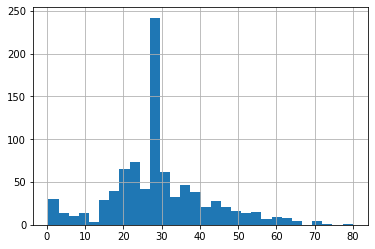

In [19]:
train.Age.hist(bins = 30)

In [18]:
train['Age'].fillna((train['Age'].median()), inplace=True)

In [20]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
print(train.Cabin.describe())

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object


In [22]:
print(train.Cabin.describe())

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object


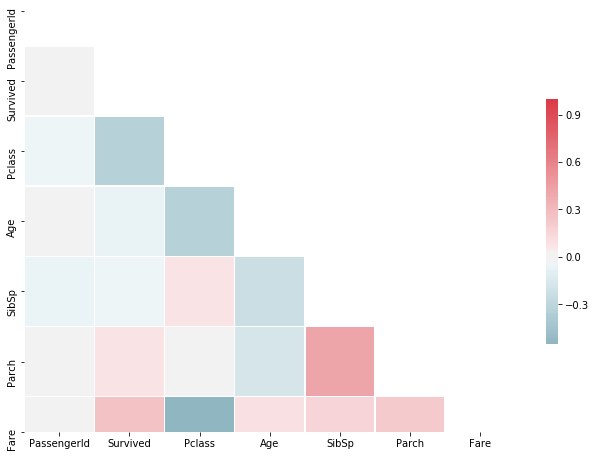

In [23]:

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

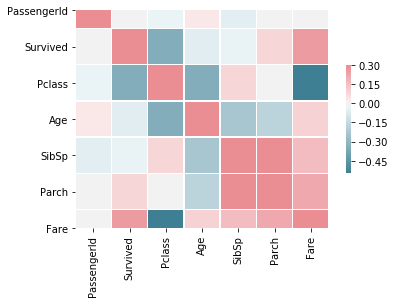

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), vmax=.3, cmap=cmap, center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5})

In [24]:
train = train.drop(columns=['Cabin'])

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [27]:
train = train.dropna()

In [28]:
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [29]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [31]:
train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [32]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [34]:
# Get one hot encoding
one_hot = pd.get_dummies(train['Sex'])

In [35]:
# Get one hot encoding
one_hot = pd.get_dummies(train['Sex'])
# Drop column
train = train.drop('Sex',axis = 1)
# Join the encoded df
train = train.join(one_hot)

In [36]:
# Get one hot encoding
one_hot = pd.get_dummies(train['Embarked'])
# Drop column
train = train.drop('Embarked',axis = 1)
# Join the encoded df
train = train.join(one_hot)

In [37]:
train = train.drop(columns=['Name'])

In [38]:
train = train.drop(columns=['Ticket'])

In [39]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [40]:
X = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
y = train[['Survived']]

In [42]:
X.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [52]:
y.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [44]:
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [49]:
X_train.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
748,749,1,19.0,1,0,53.1000,0,1,0,0,1
45,46,3,28.0,0,0,8.0500,0,1,0,0,1
28,29,3,28.0,0,0,7.8792,1,0,0,1,0
633,634,1,28.0,0,0,0.0000,0,1,0,0,1
403,404,3,28.0,1,0,15.8500,0,1,0,0,1


In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6404494382022472


c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [51]:
model=linear_model.LogisticRegression(C=1,penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,y)
preds=model.predict(X)
accuracy_score(y, preds)

c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.6850393700787402

In [52]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the test set: 0.749


In [53]:
print('Accuracy on the training set: {:.3f}'.format(dtc.score(X_train,y_train)))

Accuracy on the training set: 1.000


In [60]:
# standardizer = StandardScaler()
# X_std = standardizer.fit_transform(X)

In [55]:
pipe = Pipeline([ ('knn', knn)])
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [56]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X, y)

c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pi

c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\pi

In [57]:
clf.best_estimator_.get_params()['knn__n_neighbors']

4

In [71]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean', n_jobs=-1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6741573033707865


c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [82]:
model=linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,y)
preds=model.predict(X)
accuracy_score(y, preds)

c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\care1e55\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.6850393700787402

In [76]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the test set: 0.749


In [94]:
DecisionTreeClassifier().get_params().values()

dict_values([None, 'gini', None, None, None, 0.0, None, 1, 2, 0.0, False, None, 'best'])

In [ ]:
['max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf']

In [64]:
dic = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'max_features': [1,2,3,4,5,6,7,8,9,10]}

In [73]:
dic

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [59]:
param_grid = {'max_depth': np.arange(3, 10)}

In [65]:
dtc_ = GridSearchCV(DecisionTreeClassifier(), dic, cv=5, verbose=1).fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


In [67]:
dtc_.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [69]:
dtc = DecisionTreeClassifier(max_depth=6,max_features=3,random_state=42) 
dtc.fit(X_train, y_train)
print('Accuracy on the test set: {:.3f}'.format(dtc.score(X_test,y_test)))

Accuracy on the test set: 0.775


In [72]:
dtc = DecisionTreeClassifier(max_depth=6,max_features=3,random_state=42) 
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [73]:
test['Age'].fillna((test['Age'].median()), inplace=True)
test = test.drop(columns=['Cabin'])
test = test.drop(columns=['Name'])
test = test.drop(columns=['Ticket'])
test = test.dropna()
# Get one hot encoding
one_hot = pd.get_dummies(test['Sex'])
# Drop column
test = test.drop('Sex',axis = 1)
# Join the encoded df
test = test.join(one_hot)

# Get one hot
one_hot = pd.get_dummies(test['Embarked'])
# Drop column
test = test.drop('Embarked',axis = 1)
# Join the encoded df
test = test.join(one_hot)

In [74]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,27.0,0,0,8.0500,0,1,0,0,1


In [75]:
predictions = dtc.predict(test)

In [77]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

In [78]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [79]:
filename = 'Titanic Predictions 1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv
